# Decision Tree

# Importing Modules

In [3]:
from sklearn.datasets import load_iris

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

import pandas as pd


In [4]:
dataset = load_iris()

In [23]:
X = dataset.data
y = dataset.target

In [24]:
print(X.shape, y.shape)

(150, 4) (150,)


In [25]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# Creating Dataset

In [28]:
df = pd.DataFrame(X, columns=dataset.feature_names)

In [29]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [30]:
# Standardization
df = (df - df.min()) / (df.max() - df.min())

In [31]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [32]:
df['target'] = y

In [33]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


# Model

In [34]:
model = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=7,
    random_state=57
)

In [35]:
model

DecisionTreeClassifier(max_depth=7, random_state=57)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [37]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105, 4) (45, 4) (105,) (45,)


In [38]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=57)

# Evaluation

In [39]:
model.predict([X_test[20]])

array([0])

In [40]:
y_test[20]

0

In [45]:
[cls] = dataset.target_names[model.predict([X_test[20]])]

In [46]:
cls

'setosa'

[Text(125.55000000000001, 195.696, 'X[2] <= 2.45\ngini = 0.663\nsamples = 105\nvalue = [39, 36, 30]'),
 Text(83.7, 152.208, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(167.4, 152.208, 'X[3] <= 1.65\ngini = 0.496\nsamples = 66\nvalue = [0, 36, 30]'),
 Text(83.7, 108.72, 'X[2] <= 4.95\ngini = 0.102\nsamples = 37\nvalue = [0, 35, 2]'),
 Text(41.85, 65.232, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(125.55000000000001, 65.232, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(251.10000000000002, 108.72, 'X[2] <= 4.85\ngini = 0.067\nsamples = 29\nvalue = [0, 1, 28]'),
 Text(209.25, 65.232, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(167.4, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(251.10000000000002, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(292.95, 65.232, 'gini = 0.0\nsamples = 25\nvalue = [0, 0, 25]')]

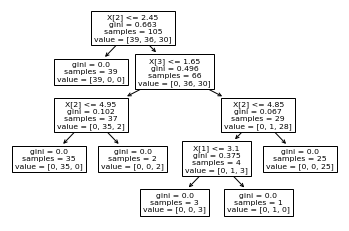

In [47]:
plot_tree(model)